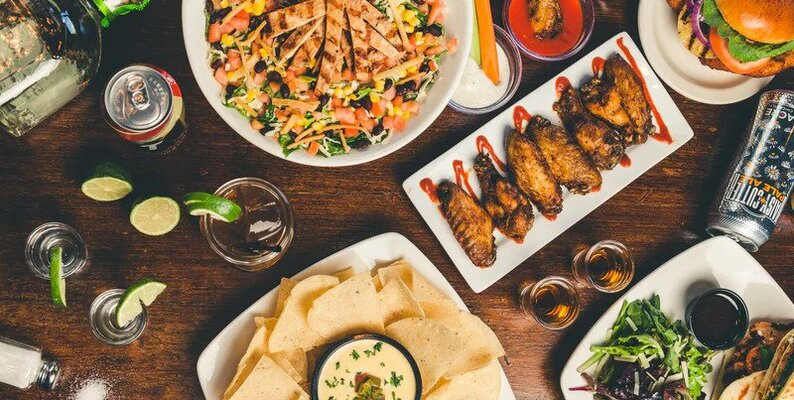

## Author: Priya Chakradhari  
## Focus: Exploratory Data Analysis & Machine Learning - Tips dataset

### "This notebook analyzes restaurant tipping behavior using the Tips dataset and applies machine learning models to understand and predict tip patterns."

## LinkedIn: https://www.linkedin.com/in/priya-chakradhari/  
## GitHub: https://github.com/priyachakradhari  
## Twitter(X): https://x.com/PriyaChakr87701

# <h1 style="color:#4DA3FF;">  Meta Data
The Tips dataset from Seaborn contains information about restaurant bills and customer tipping behavior. It includes 244 records with the following columns:

| Column Name | Description                                                   |
| ----------- | ------------------------------------------------------------- |
| total_bill  | Total bill amount (in USD) for the table                      |
| tip         | Tip given by the customer (in USD)                            |
| sex         | Gender of the person paying the bill (Male / Female)          |
| smoker      | Indicates whether the customer is a smoker (Yes / No)         |
| day         | Day of the week when the visit occurred (Thur, Fri, Sat, Sun) |
| time        | Time of day of the visit (Lunch / Dinner)                     |
| size        | Number of people at the table                                 |


This dataset is commonly used for exploring relationships between bill amounts, tips, customer demographics, and other factors. It is ideal for regression and classification tasks in data analysis and machine learning, such as predicting tips or analyzing tipping patterns.

# <h1 style= "color:#4DA3FF"> Analysis begins here.

## <h2 style = 'color:#F4CD08'> 1. Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## <h2 style = 'color:#F4CD08'> 2. Explore dataset

In [2]:
df = sns.load_dataset('tips')
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## <h2 style = 'color:#A6DCDC'> - Shape of data

In [3]:
# shape of data
df.shape

(244, 7)

## <h2 style = 'color:#A6DCDC'>- Information about data

In [4]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## <h2 style = 'color:#A6DCDC'>- Checking the null value of data

In [5]:
# Checking the null value of data
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## <h2 style = 'color:#A6DCDC'>- Stats about the data

In [6]:
# stats about the data
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## <h2 style = 'color:#F4CD08'>3. EDA

## <h2 style = 'color:#A6DCDC'>- Univariate Analysis

In [7]:
df.sex.value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [8]:
df.smoker.value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

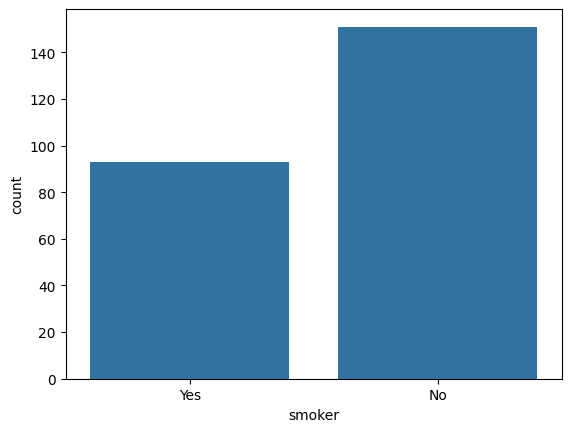

In [9]:
sns.countplot(df, x = 'smoker')
plt.show()

In [10]:
df.day.value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

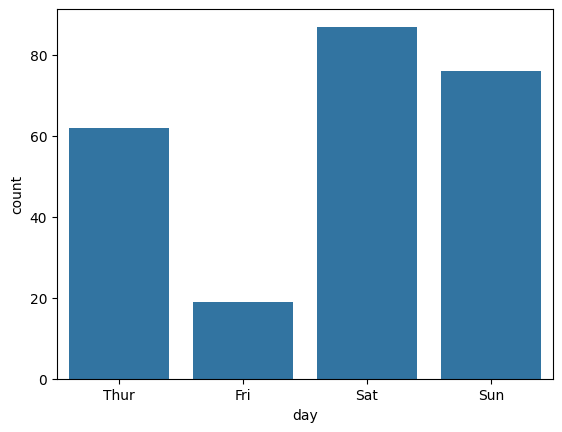

In [11]:
sns.countplot(df, x= 'day')
plt.show()

In [12]:
df.time.value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

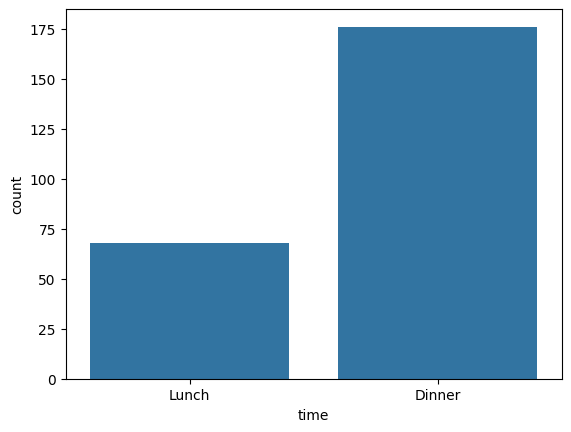

In [13]:
sns.countplot(df, x= 'time')
plt.show()

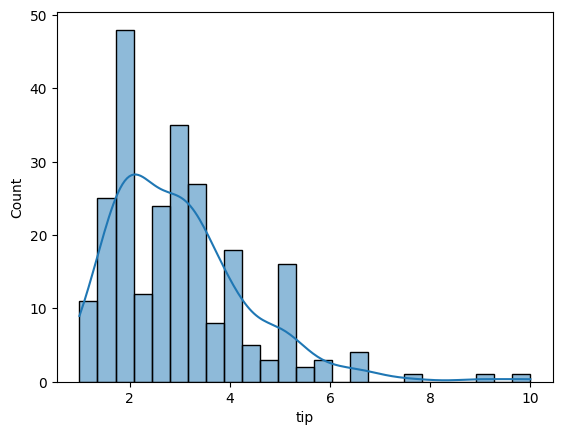

In [14]:
sns.histplot(x='tip', kde = True, bins=25, data=df)
plt.show()

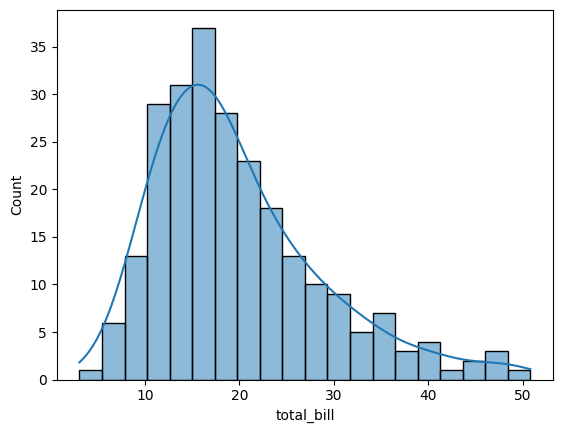

In [15]:
sns.histplot(x = 'total_bill', kde = True, bins=20, data = df)
plt.show()

## <h2 style = 'color:#A6DCDC'> - Bivariate Analysis

In [16]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
fig = px.violin(df, x= 'sex', y = 'total_bill', color = 'smoker' )
fig.show()

In [18]:
df.groupby(['sex'])['smoker'].value_counts()

sex     smoker
Male    No        97
        Yes       60
Female  No        54
        Yes       33
Name: count, dtype: int64

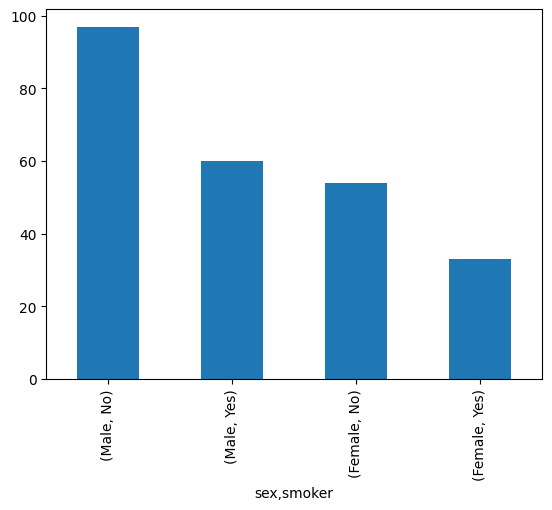

In [19]:
df.groupby(['sex'])['smoker'].value_counts().plot(kind = 'bar')
plt.show()

In [20]:
df.groupby(['sex'])['time'].value_counts()

sex     time  
Male    Dinner    124
        Lunch      33
Female  Dinner     52
        Lunch      35
Name: count, dtype: int64

In [21]:
fig= px.histogram(df, x = 'tip', color = 'sex')
fig.show()

In [22]:
fig = px.histogram(df, x="total_bill", color = 'sex')
fig.show()

In [23]:
fig =px.bar(df, x = 'day', color = 'sex')
fig.show()

## <h2 style = 'color:#A6DCDC'> - Multivariate Analysis

In [24]:
fig = px.bar(df, x = 'time', y ='tip', color = 'sex')
fig.show()

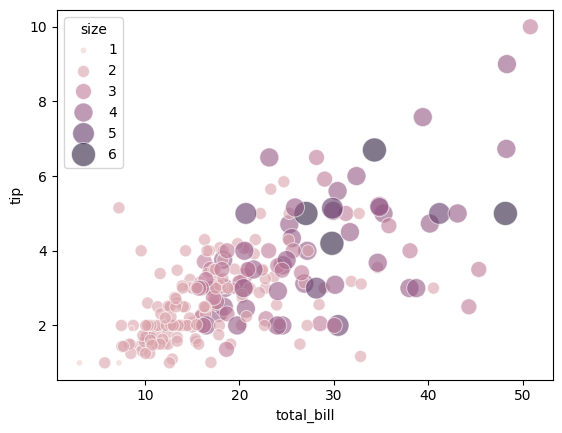

In [25]:
sns.scatterplot(x='total_bill', y='tip', size='size', hue='size', sizes=(20, 300), alpha=0.6, data=df)
plt.show()

## <h2 style = 'color:#F4CD08'>4. Feature Encoding

In [26]:
lb = LabelEncoder()

for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = lb.fit_transform(df[col])

In [27]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


## <h2 style = 'color:#F4CD08'>5. Train Test Split

In [28]:
X = df.drop(['tip'], axis = 1)
y = df['tip']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [30]:
print("X shape:", X.shape)
print("y shape:", y.shape)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X shape: (244, 6)
y shape: (244,)
X_train shape: (195, 6)
y_train shape: (195,)


## <h2 style = 'color:#F4CD08'> 6. Train Model 

In [31]:
model = RandomForestRegressor( random_state = 42)

model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [32]:
y_pred = model.predict(X_test)

## <h2 style = 'color:#F4CD08'> 7. Model Evaluation 

In [33]:


mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"MAE : {mae}")
print(f"RMSE: {rmse}")
print(f"R2  : {r2}")


MAE : 0.7750510204081635
RMSE: 0.9811018013916186
R2  : 0.2299337514142753


## <h2 style = 'color:#F4CD08'> 8. Cross - Validation

In [34]:
from sklearn.model_selection import KFold, cross_val_score

X = pd.get_dummies(df.drop(columns=['tip']), drop_first=True)
y = df['tip']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

mse_scores = -cv_scores

rmse_scores = np.sqrt(mse_scores)

## <h2 style = 'color:#F4CD08'> 9. Result

In [35]:
print("--- Result of K Fold Cross Validation ---")
print(f"5 Layers MSE: {mse_scores}")
print(f"5 Layers RMSE: {rmse_scores}")
print("-" * 45)
print(f"Mean MSE (Test): {mse_scores.mean():.3f}")
print(f"Mean RMSE (Test): {rmse_scores.mean():.3f}")
print(f"RMSE Standard Variation: {rmse_scores.std():.3f}")

--- Result of K Fold Cross Validation ---
5 Layers MSE: [0.90406396 1.15135435 0.94754774 0.88004575 1.33869903]
5 Layers RMSE: [0.95082278 1.07301181 0.97342064 0.93810754 1.15702162]
---------------------------------------------
Mean MSE (Test): 1.044
Mean RMSE (Test): 1.018
RMSE Standard Variation: 0.084
